# Assignment 3
---
Samarth Kumar

#### README:
1. Required Depdencies:
* Numpy
* Pandas
* Matplotlib
* Gensim
* Scikit-learn
* Seaborn
* nltk
* PyTorch (2.6.0)
* Cuda (11.8)

The above are for Python 3.11.4.

2. For the final question involving the Seq2Seq, I ran locally using the above dependency versions, 
including Cuda for my computer's GPU (Nvidia GeForce RTX4060ti).

3. Make sure your python version is 3.11.4 and install the depdencies according to that version. Use Google Colab's GPU's unless using a local computer with access to a GPU. 

4. Run the coding blocks in chronological order.

## Question 1: Word Embeddings

In [1]:
%pip install --upgrade numpy
%pip install gensim

  Using cached numpy-2.2.4-cp311-cp311-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
tensorflow-cpu 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import gensim.downloader as api
from gensim.models import FastText
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Load the Data

In [3]:
def load_glove_model():
    print("Loading Glove-twitter-50D model...")
    return api.load('glove-twitter-50')

Similarity Matrix for the Glove-twitter-50D

In [4]:
def similarity_matrix_glove(model, words):

    # Get word vectors
    word_vectors = []
    for word in words:
        try:
            word_vectors.append(model[word.lower()])
        except KeyError:
            print(f"Warning: '{word}' not found in Glove vocabulary")
            word_vectors.append(np.zeros(50))  # Use zero vector for unknown words
    
    # Convert to numpy array
    word_vectors = np.array(word_vectors)
    
    # Compute cosine similarity
    similarity_matrix = cosine_similarity(word_vectors)
    
    return similarity_matrix

FastText model

In [5]:
def train_fasttext_model(words):

    # Create sentences with context (simple example sentences)
    sentences = [
        ['the', 'dog', 'bark', 'loudly'],
        ['a', 'tree', 'grows', 'tall'],
        ['the', 'bank', 'near', 'river'],
        ['save', 'money', 'in', 'bank'],
        ['river', 'flows', 'by', 'tree'],
        ['dog', 'plays', 'near', 'tree'],
    ]
    
    # Initialize and train FastText model
    model = FastText(vector_size=50, window=5, min_count=1, sentences=sentences, epochs=10)
    return model

Similarity Matrix for FastText

In [6]:
def similarity_matrix_fasttext(model, words):

    # Get word vectors
    word_vectors = []
    for word in words:
        word_vectors.append(model.wv[word.lower()])
    
    # Convert to numpy array
    word_vectors = np.array(word_vectors)
    
    # Compute cosine similarity
    similarity_matrix = cosine_similarity(word_vectors)
    
    return similarity_matrix

Function to display the matrices, using a Pandas dataframe

In [7]:
def display_similarity_matrix(matrix, words, title):
    df = pd.DataFrame(matrix, index=words, columns=words)
    print(f"\n{title}:")
    print(df.round(4))

#### a) Glove-Twitter-50D Matrix

In [8]:
 # Define the words
words = ['Dog', 'Bark', 'Tree', 'Bank', 'River', 'Money']

print("\nPart A: Using Glove-twitter-50D word2vec")
glove_model = load_glove_model()
glove_similarity = similarity_matrix_glove(glove_model, words)
display_similarity_matrix(glove_similarity, words, "Glove-twitter-50D Cosine Similarities")


Part A: Using Glove-twitter-50D word2vec
Loading Glove-twitter-50D model...

Glove-twitter-50D Cosine Similarities:
          Dog    Bark    Tree    Bank   River   Money
Dog    1.0000  0.5938  0.7138  0.3482  0.4012  0.5751
Bark   0.5938  1.0000  0.5459  0.0401  0.2666  0.2910
Tree   0.7138  0.5459  1.0000  0.3495  0.4871  0.5101
Bank   0.3482  0.0401  0.3495  1.0000  0.3199  0.6747
River  0.4012  0.2666  0.4871  0.3199  1.0000  0.3378
Money  0.5751  0.2910  0.5101  0.6747  0.3378  1.0000


#### b) FastText Matrix

In [9]:
print("\nPart B: Using FastText")
fasttext_model = train_fasttext_model(words)
fasttext_similarity = similarity_matrix_fasttext(fasttext_model, words)
display_similarity_matrix(fasttext_similarity, words, "FastText Cosine Similarities")


Part B: Using FastText

FastText Cosine Similarities:
          Dog    Bark    Tree    Bank   River   Money
Dog    1.0000  0.1253 -0.1284 -0.0506 -0.0109 -0.0385
Bark   0.1253  1.0000  0.0583  0.2127  0.0185 -0.0558
Tree  -0.1284  0.0583  1.0000 -0.0041 -0.0412 -0.1377
Bank  -0.0506  0.2127 -0.0041  1.0000  0.1523  0.0107
River -0.0109  0.0185 -0.0412  0.1523  1.0000 -0.1105
Money -0.0385 -0.0558 -0.1377  0.0107 -0.1105  1.0000


#### c) Compare the results from (a) and (b)

In [10]:
print("\nPart C: Semantic Analysis")
print("\nComparison of embeddings:")
print("1. Glove-twitter-50D:")
print("   - Pre-trained on Twitter data")
print("   - Captures general word relationships from social media context")
print("   - Better for common words and social media language")
    
print("\n2. FastText:")
print("   - Trained on our custom minimal context")
print("   - Uses subword information (n-grams)")
print("   - Better for out-of-vocabulary words")
print("   - Can handle morphologically rich languages better")


Part C: Semantic Analysis

Comparison of embeddings:
1. Glove-twitter-50D:
   - Pre-trained on Twitter data
   - Captures general word relationships from social media context
   - Better for common words and social media language

2. FastText:
   - Trained on our custom minimal context
   - Uses subword information (n-grams)
   - Better for out-of-vocabulary words
   - Can handle morphologically rich languages better


In [11]:
# Analyze specific word relationships
print("\nSpecific word relationship analysis:")
print("- Bank-Money relationship:")
glove_bank_money = glove_similarity[words.index('Bank')][words.index('Money')]
fasttext_bank_money = fasttext_similarity[words.index('Bank')][words.index('Money')]
print(f"  Glove: {glove_bank_money:.4f}, FastText: {fasttext_bank_money:.4f}")
    
print("- Dog-Bark relationship:")
glove_dog_bark = glove_similarity[words.index('Dog')][words.index('Bark')]
fasttext_dog_bark = fasttext_similarity[words.index('Dog')][words.index('Bark')]
print(f"  Glove: {glove_dog_bark:.4f}, FastText: {fasttext_dog_bark:.4f}")


Specific word relationship analysis:
- Bank-Money relationship:
  Glove: 0.6747, FastText: 0.0107
- Dog-Bark relationship:
  Glove: 0.5938, FastText: 0.1253


Overall, the Glove-twitter-50D word2vec captures better semantics, as the cosine similarity values are higher overall. The above compares two of the relationships for each model. When examining Bank-Money and Dog-Bark, word2vec resulted in higher values than FastText, thus capturing better semantics.

## Question 1: N-grams and Classification

In [13]:
%pip install nltk

                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 330.3 kB/s eta 0:00:05
     --                                       0.1/1.5 MB 655.4 kB/s eta 0:00:03
     --------------                           0.6/1.5 MB 3.2 MB/s eta 0:00:01
     ----------------------------------       1.3/1.5 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 6.4 MB/s eta 0:00:00
                                              0.0/98.2 kB ? eta -:--:--
     ---------------------------------------- 98.2/98.2 kB ? eta 0:00:00
                                              0.0/274.1 kB ? eta -:--:--
     -------------------------------------- 274.1/274.1 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import nltk
import numpy as np
import pandas as pd
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Load the Twitter data from nltk

In [15]:
def download_twitter_data():
    print("Downloading Twitter sample data...")
    nltk.download('twitter_samples')
    nltk.download('punkt')
    positive_tweets = nltk.corpus.twitter_samples.strings('positive_tweets.json')
    negative_tweets = nltk.corpus.twitter_samples.strings('negative_tweets.json')
    tweets = positive_tweets + negative_tweets
    labels = [1] * len(positive_tweets) + [0] * len(negative_tweets)
    
    return tweets, labels

#### a) Split the data 70% training and 30% testing.

In [16]:
tweets, labels = download_twitter_data()
X_train, X_test, y_train, y_test = train_test_split(
    tweets, labels, 
    test_size=0.3, 
    random_state=42, 
    stratify=labels
)

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\skuma\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skuma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
print("Training size: ", len(X_train))
print("Testing size: ", len(X_test))

Training size:  7000
Testing size:  3000


#### b) Extract n-grams for n in [1,4]

In [18]:
def extract_ngrams(text, n):
    tokens = word_tokenize(text.lower())
    n_grams = list(ngrams(tokens, n))
    return [' '.join(gram) for gram in n_grams]

#### c) Train and Evaluate Logistic Regression model using n-gram features.

In [19]:
def train(X_train, X_test, y_train, y_test, n):

    # Create vectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n))
    
    # Transform text data to n-gram features
    X_train_features = vectorizer.fit_transform(X_train)
    X_test_features = vectorizer.transform(X_test)
    
    # Train logistic regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_features, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_features)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report, len(vectorizer.get_feature_names_out())

In [ ]:
accuracies = []
feature_counts = []

n = 1

In [27]:
print(f"\nTraining model with {1}-grams")
accuracy, report, feature_count = train(
    X_train, X_test, y_train, y_test, 1
)
accuracies.append(accuracy)
feature_counts.append(feature_count)
        
print(f"\n{1}-gram Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Number of features: {feature_count}")


Training model with 1-grams

1-gram Model Performance:
Accuracy: 0.7647
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1500
           1       0.77      0.75      0.76      1500

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000

Number of features: 15774


n = 2

In [28]:
print(f"\nTraining model with {2}-grams")
accuracy, report, feature_count = train(
    X_train, X_test, y_train, y_test, 2
)
accuracies.append(accuracy)
feature_counts.append(feature_count)
        
print(f"\n{2}-gram Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Number of features: {feature_count}")


Training model with 2-grams

2-gram Model Performance:
Accuracy: 0.6987
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1500
           1       0.76      0.58      0.66      1500

    accuracy                           0.70      3000
   macro avg       0.71      0.70      0.69      3000
weighted avg       0.71      0.70      0.69      3000

Number of features: 43131


n = 3

In [29]:
print(f"\nTraining model with {3}-grams")
accuracy, report, feature_count = train(
    X_train, X_test, y_train, y_test, 3
)
accuracies.append(accuracy)
feature_counts.append(feature_count)
        
print(f"\n{3}-gram Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Number of features: {feature_count}")


Training model with 3-grams

3-gram Model Performance:
Accuracy: 0.6137
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      1500
           1       0.82      0.29      0.43      1500

    accuracy                           0.61      3000
   macro avg       0.70      0.61      0.57      3000
weighted avg       0.70      0.61      0.57      3000

Number of features: 51263


n = 4

In [30]:
print(f"\nTraining model with {4}-grams")
accuracy, report, feature_count = train(
    X_train, X_test, y_train, y_test, 4
)
accuracies.append(accuracy)
feature_counts.append(feature_count)
        
print(f"\n{4}-gram Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print(f"Number of features: {feature_count}")


Training model with 4-grams

4-gram Model Performance:
Accuracy: 0.5700
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.99      0.70      1500
           1       0.92      0.15      0.26      1500

    accuracy                           0.57      3000
   macro avg       0.73      0.57      0.48      3000
weighted avg       0.73      0.57      0.48      3000

Number of features: 47613


#### d) Compare the performances using different values of n in n-grams

In [31]:
def plot_performance(accuracies, feature_counts):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot accuracies
    ax1.plot(range(1, 5), accuracies, marker='o')
    ax1.set_xlabel('n-gram size')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Model Accuracy vs n-gram size')
    ax1.grid(True)
    
    # Plot feature counts
    ax2.bar(range(1, 5), feature_counts)
    ax2.set_xlabel('n-gram size')
    ax2.set_ylabel('Number of Features')
    ax2.set_title('Number of Features vs n-gram size')
    
    plt.tight_layout()
    plt.savefig('ngram_analysis.png')
    plt.show()


Part (d): Analyzing n-gram effect on model performance


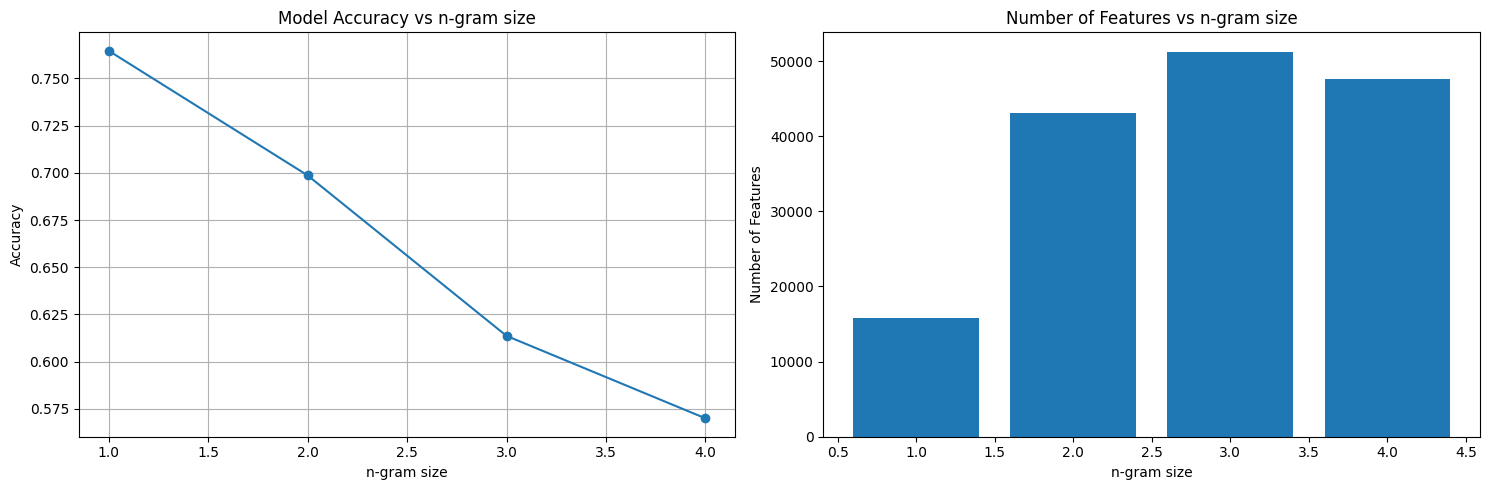


Analysis of n-gram effect on model performance:
1. Accuracy trends:
   1-gram: 0.7647
   2-gram: 0.6987
   3-gram: 0.6137
   4-gram: 0.5700

2. Feature space size:
   1-gram: 15774 features
   2-gram: 43131 features
   3-gram: 51263 features
   4-gram: 47613 features

3. Key observations:
   - As n increases, the feature space grows significantly
   - Higher n-grams capture more context but may lead to sparsity
   - Trade-off between context capture and computational complexity
   - Best performing n-gram size:  1


In [32]:
# Plot and analyze results
print("\nPart (d): Analyzing n-gram effect on model performance")
plot_performance(accuracies, feature_counts)
    
print("\nAnalysis of n-gram effect on model performance:")
print("1. Accuracy trends:")
for n, acc in enumerate(accuracies, 1):
    print(f"   {n}-gram: {acc:.4f}")
    
print("\n2. Feature space size:")
for n, count in enumerate(feature_counts, 1):
    print(f"   {n}-gram: {count} features")
    
print("\n3. Key observations:")
print("   - As n increases, the feature space grows significantly")
print("   - Higher n-grams capture more context but may lead to sparsity")
print("   - Trade-off between context capture and computational complexity")
print("   - Best performing n-gram size: ", np.argmax(accuracies) + 1)

## 2) RNN and Machine Translation

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from datasets import load_dataset
import evaluate
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\skuma\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load data, tokenize, build vocabulary

In [34]:
def build_vocab(texts, min_freq=2):
    counter = Counter()
    for line in texts:
        counter.update(line.lower().split())
    # Reserve special tokens
    vocab = {'<pad>': 0, '<unk>': 1, '<start>': 2, '<end>': 3}
    idx = 4
    for word, freq in counter.items():
        if freq >= min_freq and word not in vocab:
            vocab[word] = idx
            idx += 1
    return vocab

def tokenize(texts, vocab, max_len):
    sequences = []
    for line in texts:
        tokens = line.lower().split()
        # Leave space for <start> and <end>
        truncated = tokens[: max_len - 2]
        token_ids = [vocab['<start>']] + [vocab.get(t, vocab['<unk>']) for t in truncated] + [vocab['<end>']]
        sequences.append(torch.tensor(token_ids, dtype=torch.long))
    return sequences

def collate_fn(batch):
    inputs, targets = zip(*batch)
    inputs = pad_sequence(inputs, batch_first=True, padding_value=0)
    targets = pad_sequence(targets, batch_first=True, padding_value=0)
    return inputs.to(DEVICE), targets.to(DEVICE)

def load_data(input_len, summary_len):
    dataset = load_dataset("billsum", split="ca_test")
    train_test = dataset.train_test_split(test_size=0.2)
    train_data = train_test["train"]
    test_data = train_test["test"]

    train_texts = [t[:input_len] for t in train_data["text"]]
    train_summaries = [s[:summary_len] for s in train_data["summary"]]
    test_texts = [t[:input_len] for t in test_data["text"]]
    test_summaries = [s[:summary_len] for s in test_data["summary"]]

    input_vocab = build_vocab(train_texts + test_texts, min_freq=2)
    summary_vocab = build_vocab(train_summaries + test_summaries, min_freq=2)

    train_input_seq = tokenize(train_texts, input_vocab, input_len)
    train_summary_seq = tokenize(train_summaries, summary_vocab, summary_len)
    test_input_seq = tokenize(test_texts, input_vocab, input_len)
    test_summary_seq = tokenize(test_summaries, summary_vocab, summary_len)

    return train_input_seq, train_summary_seq, test_input_seq, test_summary_seq, input_vocab, summary_vocab

Dataset class

In [35]:
class TextSummaryDataset(Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

Define the Seq2Seq Model in PyTorch

In [36]:
class Seq2SeqModel(nn.Module):
    def __init__(self, input_vocab_size, output_vocab_size, embedding_dim=256, hidden_dim=512, dropout=0.2):
        super().__init__()
        # Encoder
        self.encoder_embedding = nn.Embedding(input_vocab_size, embedding_dim, padding_idx=0)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        # Decoder
        self.decoder_embedding = nn.Embedding(output_vocab_size, embedding_dim, padding_idx=0)
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_vocab_size)
        self.dropout = nn.Dropout(dropout)

    # Forward pass
    def forward(self, src, tgt, teacher_forcing_ratio=0.5):
        batch_size, tgt_len = tgt.size()
        vocab_size = self.fc.out_features
        outputs = torch.zeros(batch_size, tgt_len, vocab_size, device=DEVICE)
        
        encoder_embedded = self.dropout(self.encoder_embedding(src))
        _, (hidden, cell) = self.encoder_lstm(encoder_embedded)

        # First input is always the <start> token
        input_token = tgt[:, 0]
        for t in range(1, tgt_len):
            embedded_t = self.dropout(self.decoder_embedding(input_token).unsqueeze(1))
            dec_output, (hidden, cell) = self.decoder_lstm(embedded_t, (hidden, cell))
            predictions = self.fc(dec_output.squeeze(1))
            outputs[:, t] = predictions

            teacher_force = random.random() < teacher_forcing_ratio
            top1 = predictions.argmax(1)
            input_token = tgt[:, t] if teacher_force else top1

        return outputs

Train and evaluate the model

In [37]:
# Train the model itself
def train_model(model, train_loader, val_loader, optimizer, criterion, epochs=10, teacher_forcing_ratio=0.5):
    model.train()
    train_losses, val_losses = [], []
    for epoch in range(epochs):
        epoch_loss = 0.0
        for src, tgt in train_loader:
            optimizer.zero_grad()
            output = model(src, tgt, teacher_forcing_ratio=teacher_forcing_ratio)
            output_dim = output.shape[-1]
            output = output[:, 1:].reshape(-1, output_dim)
            tgt_out = tgt[:, 1:].reshape(-1)
            loss = criterion(output, tgt_out)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        avg_train_loss = epoch_loss / len(train_loader)
        val_loss = evaluate_model(model, val_loader, criterion)
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss:.4f}")
    return train_losses, val_losses

# Evaluate the model by calculating the loss
def evaluate_model(model, val_loader, criterion):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for src, tgt in val_loader:
            output = model(src, tgt, teacher_forcing_ratio=0.0)
            output_dim = output.shape[-1]
            output = output[:, 1:].reshape(-1, output_dim)
            tgt_out = tgt[:, 1:].reshape(-1)
            loss = criterion(output, tgt_out)
            total_loss += loss.item()
    model.train()
    return total_loss / len(val_loader)


Decode the tokens

In [38]:
def decode(model, src, summary_vocab, max_len=128):
    model.eval()
    with torch.no_grad():
        embedded_src = model.encoder_embedding(src)
        _, (hidden, cell) = model.encoder_lstm(embedded_src)
        start_token = summary_vocab['<start>']
        end_token = summary_vocab['<end>']
        input_token = torch.tensor([start_token], device=DEVICE).unsqueeze(0)
        decoded_tokens = []
        for _ in range(max_len):
            embedded_t = model.decoder_embedding(input_token)
            dec_output, (hidden, cell) = model.decoder_lstm(embedded_t, (hidden, cell))
            preds = model.fc(dec_output.squeeze(1))
            next_token = preds.argmax(1)
            decoded_tokens.append(next_token.item())
            if next_token.item() == end_token:
                break
            input_token = next_token.unsqueeze(0)
    return decoded_tokens

Calculating the BLEU score

In [39]:
def calculate_bleu(model, test_inputs, test_targets, summary_vocab, limit=50):
    bleu = evaluate.load("bleu")
    rev_summary_vocab = {v: k for k, v in summary_vocab.items()}
    predictions = []
    references = []
    for i in range(min(limit, len(test_inputs))):
        src = test_inputs[i].unsqueeze(0).to(DEVICE)
        tgt_seq = test_targets[i]
        pred_ids = decode(model, src, summary_vocab, max_len=len(tgt_seq))
        pred_tokens = [rev_summary_vocab.get(idx, '<unk>') for idx in pred_ids if idx not in {0,1,2,3}]
        tgt_tokens = [rev_summary_vocab.get(idx.item(), '<unk>') for idx in tgt_seq if idx.item() not in {0,1,2,3}]
        predictions.append(" ".join(pred_tokens))
        references.append([" ".join(tgt_tokens)])
    results = bleu.compute(predictions=predictions, references=references)
    return results["bleu"]

Calculating the accuracy

In [40]:
def calculate_accuracy(model, test_dataset, batch_size=32):
    model.eval()
    dataloader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn)
    total_tokens = 0
    correct_tokens = 0
    with torch.no_grad():
        for src, tgt in dataloader:
            output = model(src, tgt, teacher_forcing_ratio=0.0)
            output_dim = output.shape[-1]
            output = output[:, 1:].reshape(-1, output_dim)
            tgt_out = tgt[:, 1:].reshape(-1)
            preds = output.argmax(dim=-1)
            mask = tgt_out != 0  # ignore padding
            correct_tokens += (preds[mask] == tgt_out[mask]).sum().item()
            total_tokens += mask.sum().item()
    return correct_tokens / total_tokens if total_tokens > 0 else 0

Function to run a single experiment with desired input/summary sequence lengths and hyperparameters.

In [41]:
def train_sequence(
    input_len, summary_len, epochs=5, batch_size=32,
    embedding_dim=256, hidden_dim=512, dropout=0.2,
    teacher_forcing_ratio=0.5, lr=1e-3
):
    print(f"\n--- Running experiment ---")
    print(f"Input length: {input_len}, Summary length: {summary_len}, Epochs: {epochs}, Batch size: {batch_size}")
    print(f"Embedding dim: {embedding_dim}, Hidden dim: {hidden_dim}, Dropout: {dropout}, Teacher forcing: {teacher_forcing_ratio}, LR: {lr}")

    # Load and preprocess data
    train_in, train_sum, test_in, test_sum, in_vocab, sum_vocab = load_data(input_len, summary_len)
    train_dataset = TextSummaryDataset(train_in, train_sum)
    test_dataset = TextSummaryDataset(test_in, test_sum)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

    # Create the model
    model = Seq2SeqModel(
        input_vocab_size = len(in_vocab),
        output_vocab_size = len(sum_vocab),
        embedding_dim = embedding_dim,
        hidden_dim = hidden_dim,
        dropout = dropout
    ).to(DEVICE)

    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss(ignore_index=0)

    # Train the model
    train_losses, val_losses = train_model(model, train_loader, val_loader, optimizer, criterion, epochs=epochs, teacher_forcing_ratio=teacher_forcing_ratio)

    # Plot loss curves
    plt.figure(figsize=(8,4))
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.legend()
    plt.title(f"Loss Curve (Input: {input_len}, Summary: {summary_len})")
    plt.show()

    # Evaluate BLEU and Accuracy
    bleu_score = calculate_bleu(model, test_in, test_sum, sum_vocab, limit=50)
    accuracy = calculate_accuracy(model, test_dataset, batch_size=batch_size)
    print(f"BLEU Score: {bleu_score:.4f}")
    print(f"Token-level Accuracy: {accuracy:.4f}")
    return bleu_score, accuracy

#### 2. Using number of neurons, dropout, and selection of RNN architecture.
* 512 neurons in the hidden layers
* dropout = 0.2
* The Seq2Seq model contains LSTM layers in the encoder and decoder.

#### 3) Testing input sequences of lengths 1024 and 2048, as well as summary sequence lengths of 128 and 256.


===== Experiment with Input: 1024, Summary: 128 =====

--- Running experiment ---
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32
Embedding dim: 256, Hidden dim: 512, Dropout: 0.2, Teacher forcing: 0.5, LR: 0.001
Epoch 1/20: Train Loss: 5.5933, Val Loss: 5.1190
Epoch 2/20: Train Loss: 4.7986, Val Loss: 5.0861
Epoch 3/20: Train Loss: 4.6292, Val Loss: 5.0151
Epoch 4/20: Train Loss: 4.4697, Val Loss: 5.0587
Epoch 5/20: Train Loss: 4.3634, Val Loss: 5.1347
Epoch 6/20: Train Loss: 4.2307, Val Loss: 5.1599
Epoch 7/20: Train Loss: 4.1668, Val Loss: 5.1098
Epoch 8/20: Train Loss: 3.9321, Val Loss: 5.2184
Epoch 9/20: Train Loss: 3.9100, Val Loss: 5.4415
Epoch 10/20: Train Loss: 3.8015, Val Loss: 5.2858
Epoch 11/20: Train Loss: 3.7128, Val Loss: 5.4438
Epoch 12/20: Train Loss: 3.6967, Val Loss: 5.2202
Epoch 13/20: Train Loss: 3.5813, Val Loss: 5.3902
Epoch 14/20: Train Loss: 3.4963, Val Loss: 5.6904
Epoch 15/20: Train Loss: 3.3890, Val Loss: 5.7958
Epoch 16/20: Train Loss: 

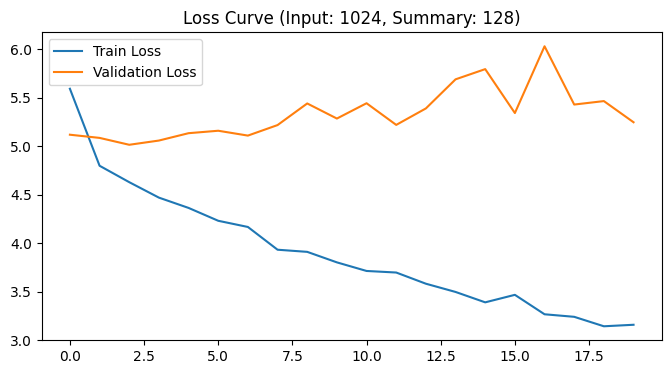

BLEU Score: 0.0091
Token-level Accuracy: 0.1600

===== Experiment with Input: 1024, Summary: 256 =====

--- Running experiment ---
Input length: 1024, Summary length: 256, Epochs: 20, Batch size: 32
Embedding dim: 256, Hidden dim: 512, Dropout: 0.2, Teacher forcing: 0.5, LR: 0.001
Epoch 1/20: Train Loss: 6.2923, Val Loss: 5.7684
Epoch 2/20: Train Loss: 5.5416, Val Loss: 5.6883
Epoch 3/20: Train Loss: 5.3514, Val Loss: 5.7445
Epoch 4/20: Train Loss: 5.2427, Val Loss: 5.7094
Epoch 5/20: Train Loss: 5.0999, Val Loss: 5.6912
Epoch 6/20: Train Loss: 5.0158, Val Loss: 5.7305
Epoch 7/20: Train Loss: 4.8892, Val Loss: 5.7058
Epoch 8/20: Train Loss: 4.8449, Val Loss: 5.7172
Epoch 9/20: Train Loss: 4.7441, Val Loss: 5.7205
Epoch 10/20: Train Loss: 4.6979, Val Loss: 5.7083
Epoch 11/20: Train Loss: 4.5947, Val Loss: 5.8006
Epoch 12/20: Train Loss: 4.5186, Val Loss: 5.7785
Epoch 13/20: Train Loss: 4.4773, Val Loss: 5.7969
Epoch 14/20: Train Loss: 4.3407, Val Loss: 5.8178
Epoch 15/20: Train Loss: 4.

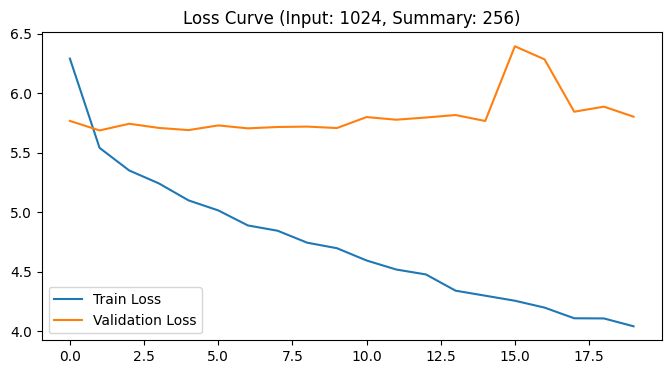

BLEU Score: 0.0156
Token-level Accuracy: 0.1013

===== Experiment with Input: 2048, Summary: 128 =====

--- Running experiment ---
Input length: 2048, Summary length: 128, Epochs: 20, Batch size: 32
Embedding dim: 256, Hidden dim: 512, Dropout: 0.2, Teacher forcing: 0.5, LR: 0.001
Epoch 1/20: Train Loss: 5.6041, Val Loss: 5.0895
Epoch 2/20: Train Loss: 4.7965, Val Loss: 5.0075
Epoch 3/20: Train Loss: 4.6152, Val Loss: 5.0165
Epoch 4/20: Train Loss: 4.4309, Val Loss: 5.1132
Epoch 5/20: Train Loss: 4.3734, Val Loss: 5.0608
Epoch 6/20: Train Loss: 4.2483, Val Loss: 5.1220
Epoch 7/20: Train Loss: 4.1244, Val Loss: 5.1173
Epoch 8/20: Train Loss: 4.0157, Val Loss: 5.1927
Epoch 9/20: Train Loss: 3.9430, Val Loss: 5.2057
Epoch 10/20: Train Loss: 3.7792, Val Loss: 5.3993
Epoch 11/20: Train Loss: 3.7538, Val Loss: 5.4617
Epoch 12/20: Train Loss: 3.6589, Val Loss: 5.1970
Epoch 13/20: Train Loss: 3.6038, Val Loss: 5.2790
Epoch 14/20: Train Loss: 3.5452, Val Loss: 5.3168
Epoch 15/20: Train Loss: 3.

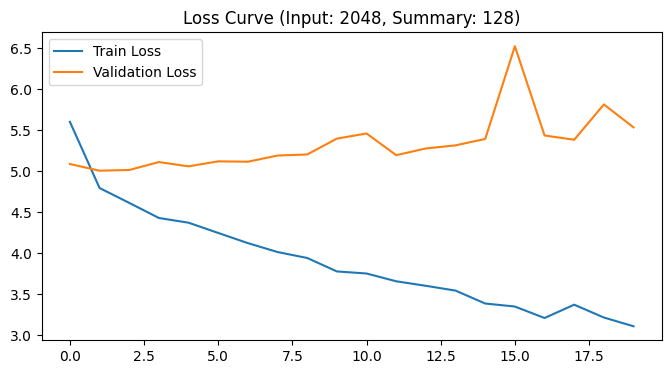

BLEU Score: 0.0498
Token-level Accuracy: 0.1369

===== Experiment with Input: 2048, Summary: 256 =====

--- Running experiment ---
Input length: 2048, Summary length: 256, Epochs: 20, Batch size: 32
Embedding dim: 256, Hidden dim: 512, Dropout: 0.2, Teacher forcing: 0.5, LR: 0.001
Epoch 1/20: Train Loss: 6.2523, Val Loss: 5.7685
Epoch 2/20: Train Loss: 5.5340, Val Loss: 5.6545
Epoch 3/20: Train Loss: 5.3653, Val Loss: 5.7033
Epoch 4/20: Train Loss: 5.2367, Val Loss: 5.6792
Epoch 5/20: Train Loss: 5.1240, Val Loss: 5.6977
Epoch 6/20: Train Loss: 5.0204, Val Loss: 5.7094
Epoch 7/20: Train Loss: 4.9144, Val Loss: 5.7206
Epoch 8/20: Train Loss: 4.8300, Val Loss: 5.7278
Epoch 9/20: Train Loss: 4.7390, Val Loss: 5.6947
Epoch 10/20: Train Loss: 4.6273, Val Loss: 5.7917
Epoch 11/20: Train Loss: 4.5528, Val Loss: 5.7733
Epoch 12/20: Train Loss: 4.4837, Val Loss: 5.7994
Epoch 13/20: Train Loss: 4.4568, Val Loss: 5.8048
Epoch 14/20: Train Loss: 4.3626, Val Loss: 5.8059
Epoch 15/20: Train Loss: 4.

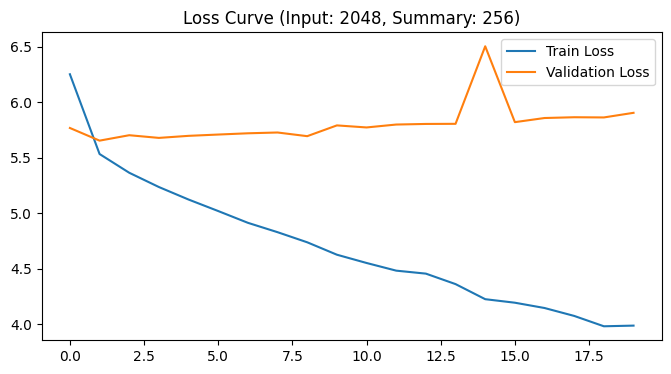

BLEU Score: 0.0034
Token-level Accuracy: 0.0921

===== Summary of Experiments =====
Input: 1024, Summary: 128 -> BLEU: 0.0091, Accuracy: 0.1600
Input: 1024, Summary: 256 -> BLEU: 0.0156, Accuracy: 0.1013
Input: 2048, Summary: 128 -> BLEU: 0.0498, Accuracy: 0.1369
Input: 2048, Summary: 256 -> BLEU: 0.0034, Accuracy: 0.0921


In [42]:
def test_input_summary_combinations():
    configs = [(1024, 128), (1024, 256), (2048, 128), (2048, 256)]
    results = {}
    for input_len, summary_len in configs:
        print(f"\n===== Experiment with Input: {input_len}, Summary: {summary_len} =====")
        bleu, acc = train_sequence(input_len, summary_len, epochs=20, batch_size=32)
        results[(input_len, summary_len)] = (bleu, acc)
    print("\n===== Summary of Experiments =====")
    for (inp, summ), (bleu, acc) in results.items():
        print(f"Input: {inp}, Summary: {summ} -> BLEU: {bleu:.4f}, Accuracy: {acc:.4f}")

# Run the experiments for different lengths
test_input_summary_combinations()

So, when input sequence was of length 1024, raising the summary sequence length from 128 to 256 increased the BLEU score.
When the summary sequence legnth was 128, the BLEU score was higher when the input sequence length was increased to 2048.

However, with the higher input sequence length of 2048, the BLEU score was higher when the summary sequence length was 128.

#### d) Hyperparameter tuning to obtain best accuracy.

In [43]:
def hyperparameter_tuning():

    # Setting embedding_dim, hidden_dim, dropout, teacher_forcing_ratio, and learning rate as the hyperparameters.
    hyperparams_list = [
        {"embedding_dim": 256, "hidden_dim": 512, "dropout": 0.2, "teacher_forcing_ratio": 0.5, "lr": 1e-3},
        {"embedding_dim": 300, "hidden_dim": 512, "dropout": 0.3, "teacher_forcing_ratio": 0.3, "lr": 1e-4},
        {"embedding_dim": 256, "hidden_dim": 256, "dropout": 0.4, "teacher_forcing_ratio": 0.6, "lr": 1e-3},
        {"embedding_dim": 128, "hidden_dim": 256, "dropout": 0.2, "teacher_forcing_ratio": 0.7, "lr": 1e-3}
    ]

    best_config = None
    best_bleu = -float('inf')
    best_accuracy = -float('inf')

    # Loop through each configuration, train the model.
    for idx, config in enumerate(hyperparams_list):
        print(f"\n--- Testing Configuration {idx+1}/{len(hyperparams_list)} ---")
        print(f"Config: {config}")
        bleu, acc = train_sequence(
            input_len=1024,
            summary_len=128,
            epochs=20,
            batch_size=32,
            embedding_dim=config["embedding_dim"],
            hidden_dim=config["hidden_dim"],
            dropout=config["dropout"],
            teacher_forcing_ratio=config["teacher_forcing_ratio"],
            lr=config["lr"]
        )
        print(f"BLEU: {bleu:.4f}, Accuracy: {acc:.4f}")

        # Update best configuration based on the bleu score.
        if bleu > best_bleu:
            best_bleu = bleu
            best_accuracy = acc
            best_config = config

    # Print the best configuration and its performance.
    print("\n=== Best Hyperparameter Configuration ===")
    print(f"Config: {best_config}")
    print(f"BLEU Score: {best_bleu:.4f}, Accuracy: {best_accuracy:.4f}")


--- Testing Configuration 1/4 ---
Config: {'embedding_dim': 256, 'hidden_dim': 512, 'dropout': 0.2, 'teacher_forcing_ratio': 0.5, 'lr': 0.001}

--- Running experiment ---
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32
Embedding dim: 256, Hidden dim: 512, Dropout: 0.2, Teacher forcing: 0.5, LR: 0.001
Epoch 1/20: Train Loss: 5.5859, Val Loss: 5.0402
Epoch 2/20: Train Loss: 4.8013, Val Loss: 4.9606
Epoch 3/20: Train Loss: 4.6244, Val Loss: 4.9968
Epoch 4/20: Train Loss: 4.4939, Val Loss: 4.9894
Epoch 5/20: Train Loss: 4.3675, Val Loss: 5.0120
Epoch 6/20: Train Loss: 4.2510, Val Loss: 5.0099
Epoch 7/20: Train Loss: 4.1501, Val Loss: 5.3292
Epoch 8/20: Train Loss: 4.0652, Val Loss: 5.1424
Epoch 9/20: Train Loss: 3.9752, Val Loss: 5.0733
Epoch 10/20: Train Loss: 3.8843, Val Loss: 5.1469
Epoch 11/20: Train Loss: 3.7674, Val Loss: 5.0491
Epoch 12/20: Train Loss: 3.6595, Val Loss: 5.1709
Epoch 13/20: Train Loss: 3.6268, Val Loss: 5.3521
Epoch 14/20: Train Loss: 3.5464, Val

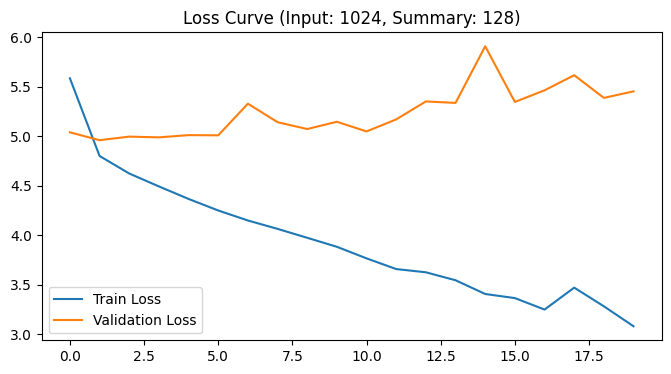

BLEU Score: 0.0246
Token-level Accuracy: 0.1535
BLEU: 0.0246, Accuracy: 0.1535

--- Testing Configuration 2/4 ---
Config: {'embedding_dim': 300, 'hidden_dim': 512, 'dropout': 0.3, 'teacher_forcing_ratio': 0.3, 'lr': 0.0001}

--- Running experiment ---
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32
Embedding dim: 300, Hidden dim: 512, Dropout: 0.3, Teacher forcing: 0.3, LR: 0.0001
Epoch 1/20: Train Loss: 7.3171, Val Loss: 7.1401
Epoch 2/20: Train Loss: 6.2276, Val Loss: 5.3610
Epoch 3/20: Train Loss: 5.0952, Val Loss: 5.1458
Epoch 4/20: Train Loss: 4.9507, Val Loss: 5.0763
Epoch 5/20: Train Loss: 4.8910, Val Loss: 5.0582
Epoch 6/20: Train Loss: 4.8538, Val Loss: 5.0326
Epoch 7/20: Train Loss: 4.8276, Val Loss: 5.0221
Epoch 8/20: Train Loss: 4.7967, Val Loss: 5.0125
Epoch 9/20: Train Loss: 4.7738, Val Loss: 5.0126
Epoch 10/20: Train Loss: 4.7600, Val Loss: 4.9966
Epoch 11/20: Train Loss: 4.7422, Val Loss: 4.9908
Epoch 12/20: Train Loss: 4.7229, Val Loss: 4.9889
Epoch

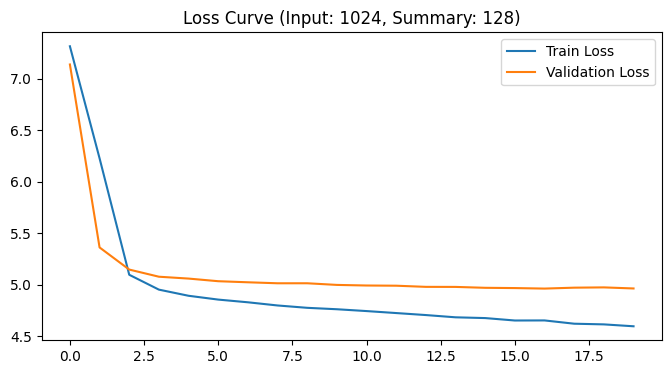

BLEU Score: 0.0123
Token-level Accuracy: 0.1657
BLEU: 0.0123, Accuracy: 0.1657

--- Testing Configuration 3/4 ---
Config: {'embedding_dim': 256, 'hidden_dim': 256, 'dropout': 0.4, 'teacher_forcing_ratio': 0.6, 'lr': 0.001}

--- Running experiment ---
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32
Embedding dim: 256, Hidden dim: 256, Dropout: 0.4, Teacher forcing: 0.6, LR: 0.001
Epoch 1/20: Train Loss: 6.0369, Val Loss: 5.1328
Epoch 2/20: Train Loss: 4.9104, Val Loss: 5.0519
Epoch 3/20: Train Loss: 4.7024, Val Loss: 5.0607
Epoch 4/20: Train Loss: 4.5569, Val Loss: 5.0178
Epoch 5/20: Train Loss: 4.4479, Val Loss: 5.0514
Epoch 6/20: Train Loss: 4.2906, Val Loss: 5.0877
Epoch 7/20: Train Loss: 4.2405, Val Loss: 5.0886
Epoch 8/20: Train Loss: 4.1312, Val Loss: 5.0953
Epoch 9/20: Train Loss: 4.0447, Val Loss: 5.1668
Epoch 10/20: Train Loss: 3.9634, Val Loss: 5.2396
Epoch 11/20: Train Loss: 3.9328, Val Loss: 5.1519
Epoch 12/20: Train Loss: 3.8399, Val Loss: 5.3445
Epoch 1

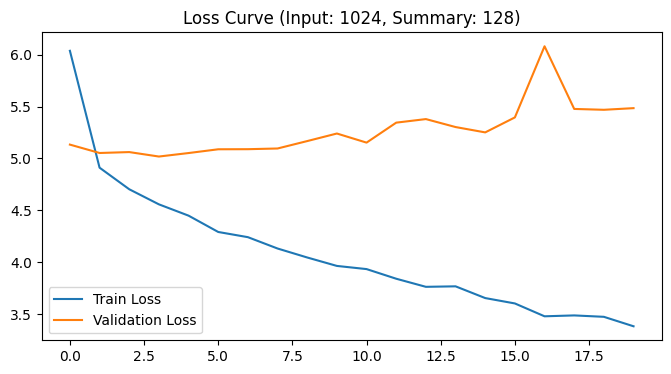

BLEU Score: 0.0561
Token-level Accuracy: 0.1405
BLEU: 0.0561, Accuracy: 0.1405

--- Testing Configuration 4/4 ---
Config: {'embedding_dim': 128, 'hidden_dim': 256, 'dropout': 0.2, 'teacher_forcing_ratio': 0.7, 'lr': 0.001}

--- Running experiment ---
Input length: 1024, Summary length: 128, Epochs: 20, Batch size: 32
Embedding dim: 128, Hidden dim: 256, Dropout: 0.2, Teacher forcing: 0.7, LR: 0.001
Epoch 1/20: Train Loss: 6.0453, Val Loss: 5.1812
Epoch 2/20: Train Loss: 4.9079, Val Loss: 5.0623
Epoch 3/20: Train Loss: 4.6833, Val Loss: 5.0724
Epoch 4/20: Train Loss: 4.5305, Val Loss: 5.1091
Epoch 5/20: Train Loss: 4.4028, Val Loss: 5.1932
Epoch 6/20: Train Loss: 4.2903, Val Loss: 5.1784
Epoch 7/20: Train Loss: 4.1987, Val Loss: 5.1730
Epoch 8/20: Train Loss: 4.1008, Val Loss: 5.3142
Epoch 9/20: Train Loss: 3.9747, Val Loss: 5.3949
Epoch 10/20: Train Loss: 3.8936, Val Loss: 5.3094
Epoch 11/20: Train Loss: 3.8379, Val Loss: 5.2891
Epoch 12/20: Train Loss: 3.7583, Val Loss: 5.4232
Epoch 1

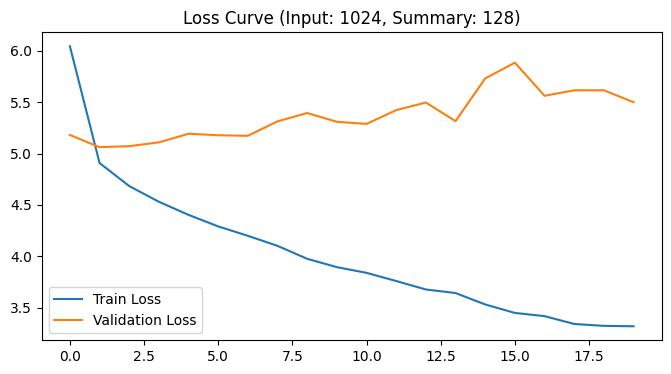

BLEU Score: 0.0494
Token-level Accuracy: 0.1522
BLEU: 0.0494, Accuracy: 0.1522

=== Best Hyperparameter Configuration ===
Config: {'embedding_dim': 256, 'hidden_dim': 256, 'dropout': 0.4, 'teacher_forcing_ratio': 0.6, 'lr': 0.001}
BLEU Score: 0.0561, Accuracy: 0.1405


In [44]:
hyperparameter_tuning()